# Gravity Machine analysis notebook

This notebook contains usage examples and worflows for Gravity Machine data analysis.

Earlier version of this analysis pipeline was used for generating figures for the paper:

> Krishnamurthy, Deepak, Hongquan Li, François Benoit du Rey, Pierre Cambournac, Adam G. Larson, Ethan Li, and Manu Prakash. "Scale-free vertical tracking microscopy." Nature Methods 17, no. 10 (2020): 1040-1051.

In [8]:
import numpy as np
import GravityMachine.Analysis as Analysis
import imp
imp.reload(Analysis)
import matplotlib.pyplot as plt
%matplotlib notebook

## Specify the data path and load the data as a GravityMachineTrack object

In [9]:
track_folder = 'D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018'
track_file = 'track_cropped.csv'

gm_analysis = Analysis.GravityMachineTrack(track_folder = track_folder, track_file = track_file, Tmin = 0, Tmax = 360)
gm_analysis.data

Loaded metadata...
{'Local time': None, 'PixelPermm': None, 'Objective': None}
**************************************************
['Time', 'Xobj', 'Yobj', 'Zobj', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Liquid Lens Freq', 'Liquid Lens Ampl', 'Liquid Lens maxGain', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
{'Time': 'Time', 'X': 'Xobj', 'Y': 'Yobj', 'Z': 'ZobjWheel', 'Image name': 'Image name', 'X_image': 'Xobj_image', 'Z_image': 'Zobj'}
Warning X_image not found in input data
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\FluidVelocityTimeseries
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images000
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images001
Subdir:  []
Dir:  D:\GravityMachine_2020\DiatomData_withv2codebase_forT

,Time,X,Y,Z,Image name,X_image,Z_image,V_x,V_y,V_z
0,0.000000,11.536563,0.171250,0.000000,IMG_3878.tif,None,-0.108280,None,None,None
1,0.025081,11.536563,0.171250,-0.010422,NaN,None,-0.108280,None,None,None
2,0.042399,11.536563,0.171250,-0.007238,NaN,None,-0.105096,None,None,None
3,0.066455,11.536563,0.171250,-0.020845,IMG_3879.tif,None,-0.108280,None,None,None
4,0.086212,11.533378,0.171250,-0.017660,NaN,None,-0.105096,None,None,None
...,...,...,...,...,...,...,...,...,...,...
16007,359.887024,10.319375,0.415938,-12.726232,IMG_8002.tif,None,0.035032,None,None,None
16008,359.912891,10.319375,0.415938,-12.715937,NaN,None,0.035032,None,None,None
16009,359.931388,10.316190,0.415938,-12.712753,NaN,None,0.038217,None,None,None
16010,359.963501,10.319062,0.415938,-12.715937,IMG_8003.tif,None,0.035032,None,None,None


## Plot the object's X, Y, Z displacement time series

<IPython.core.display.Javascript object>


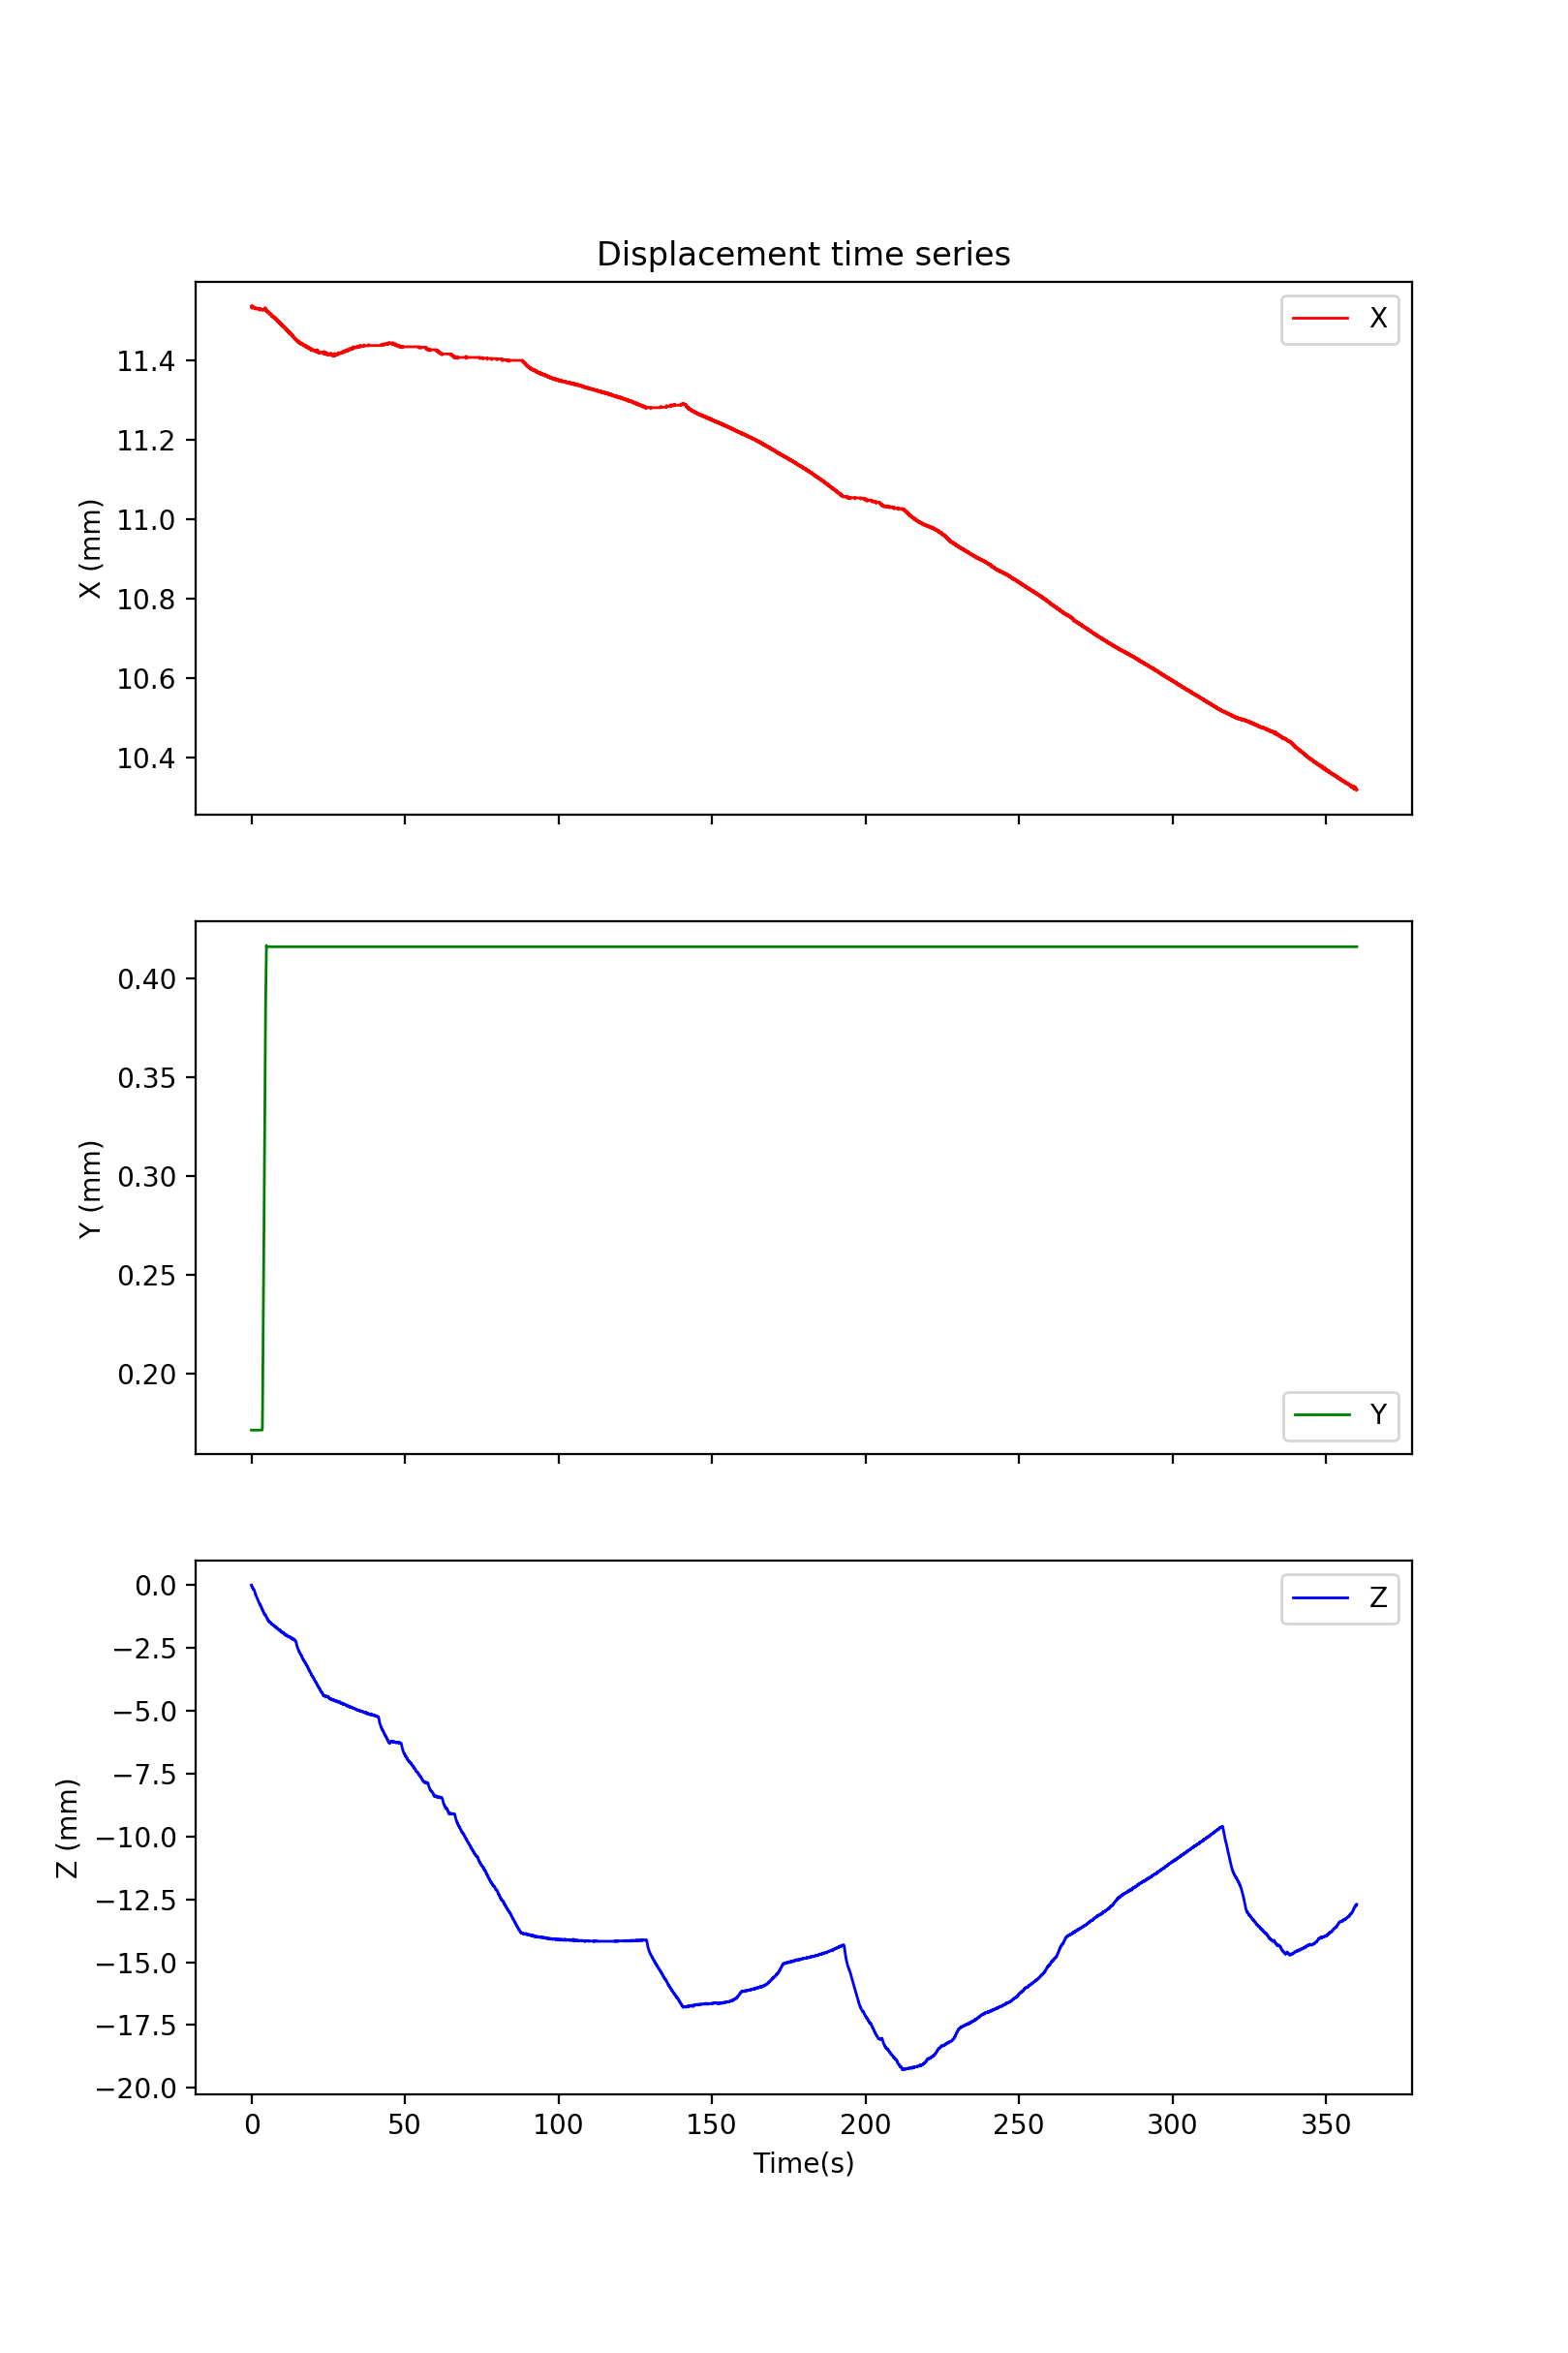

<IPython.core.display.Javascript object>


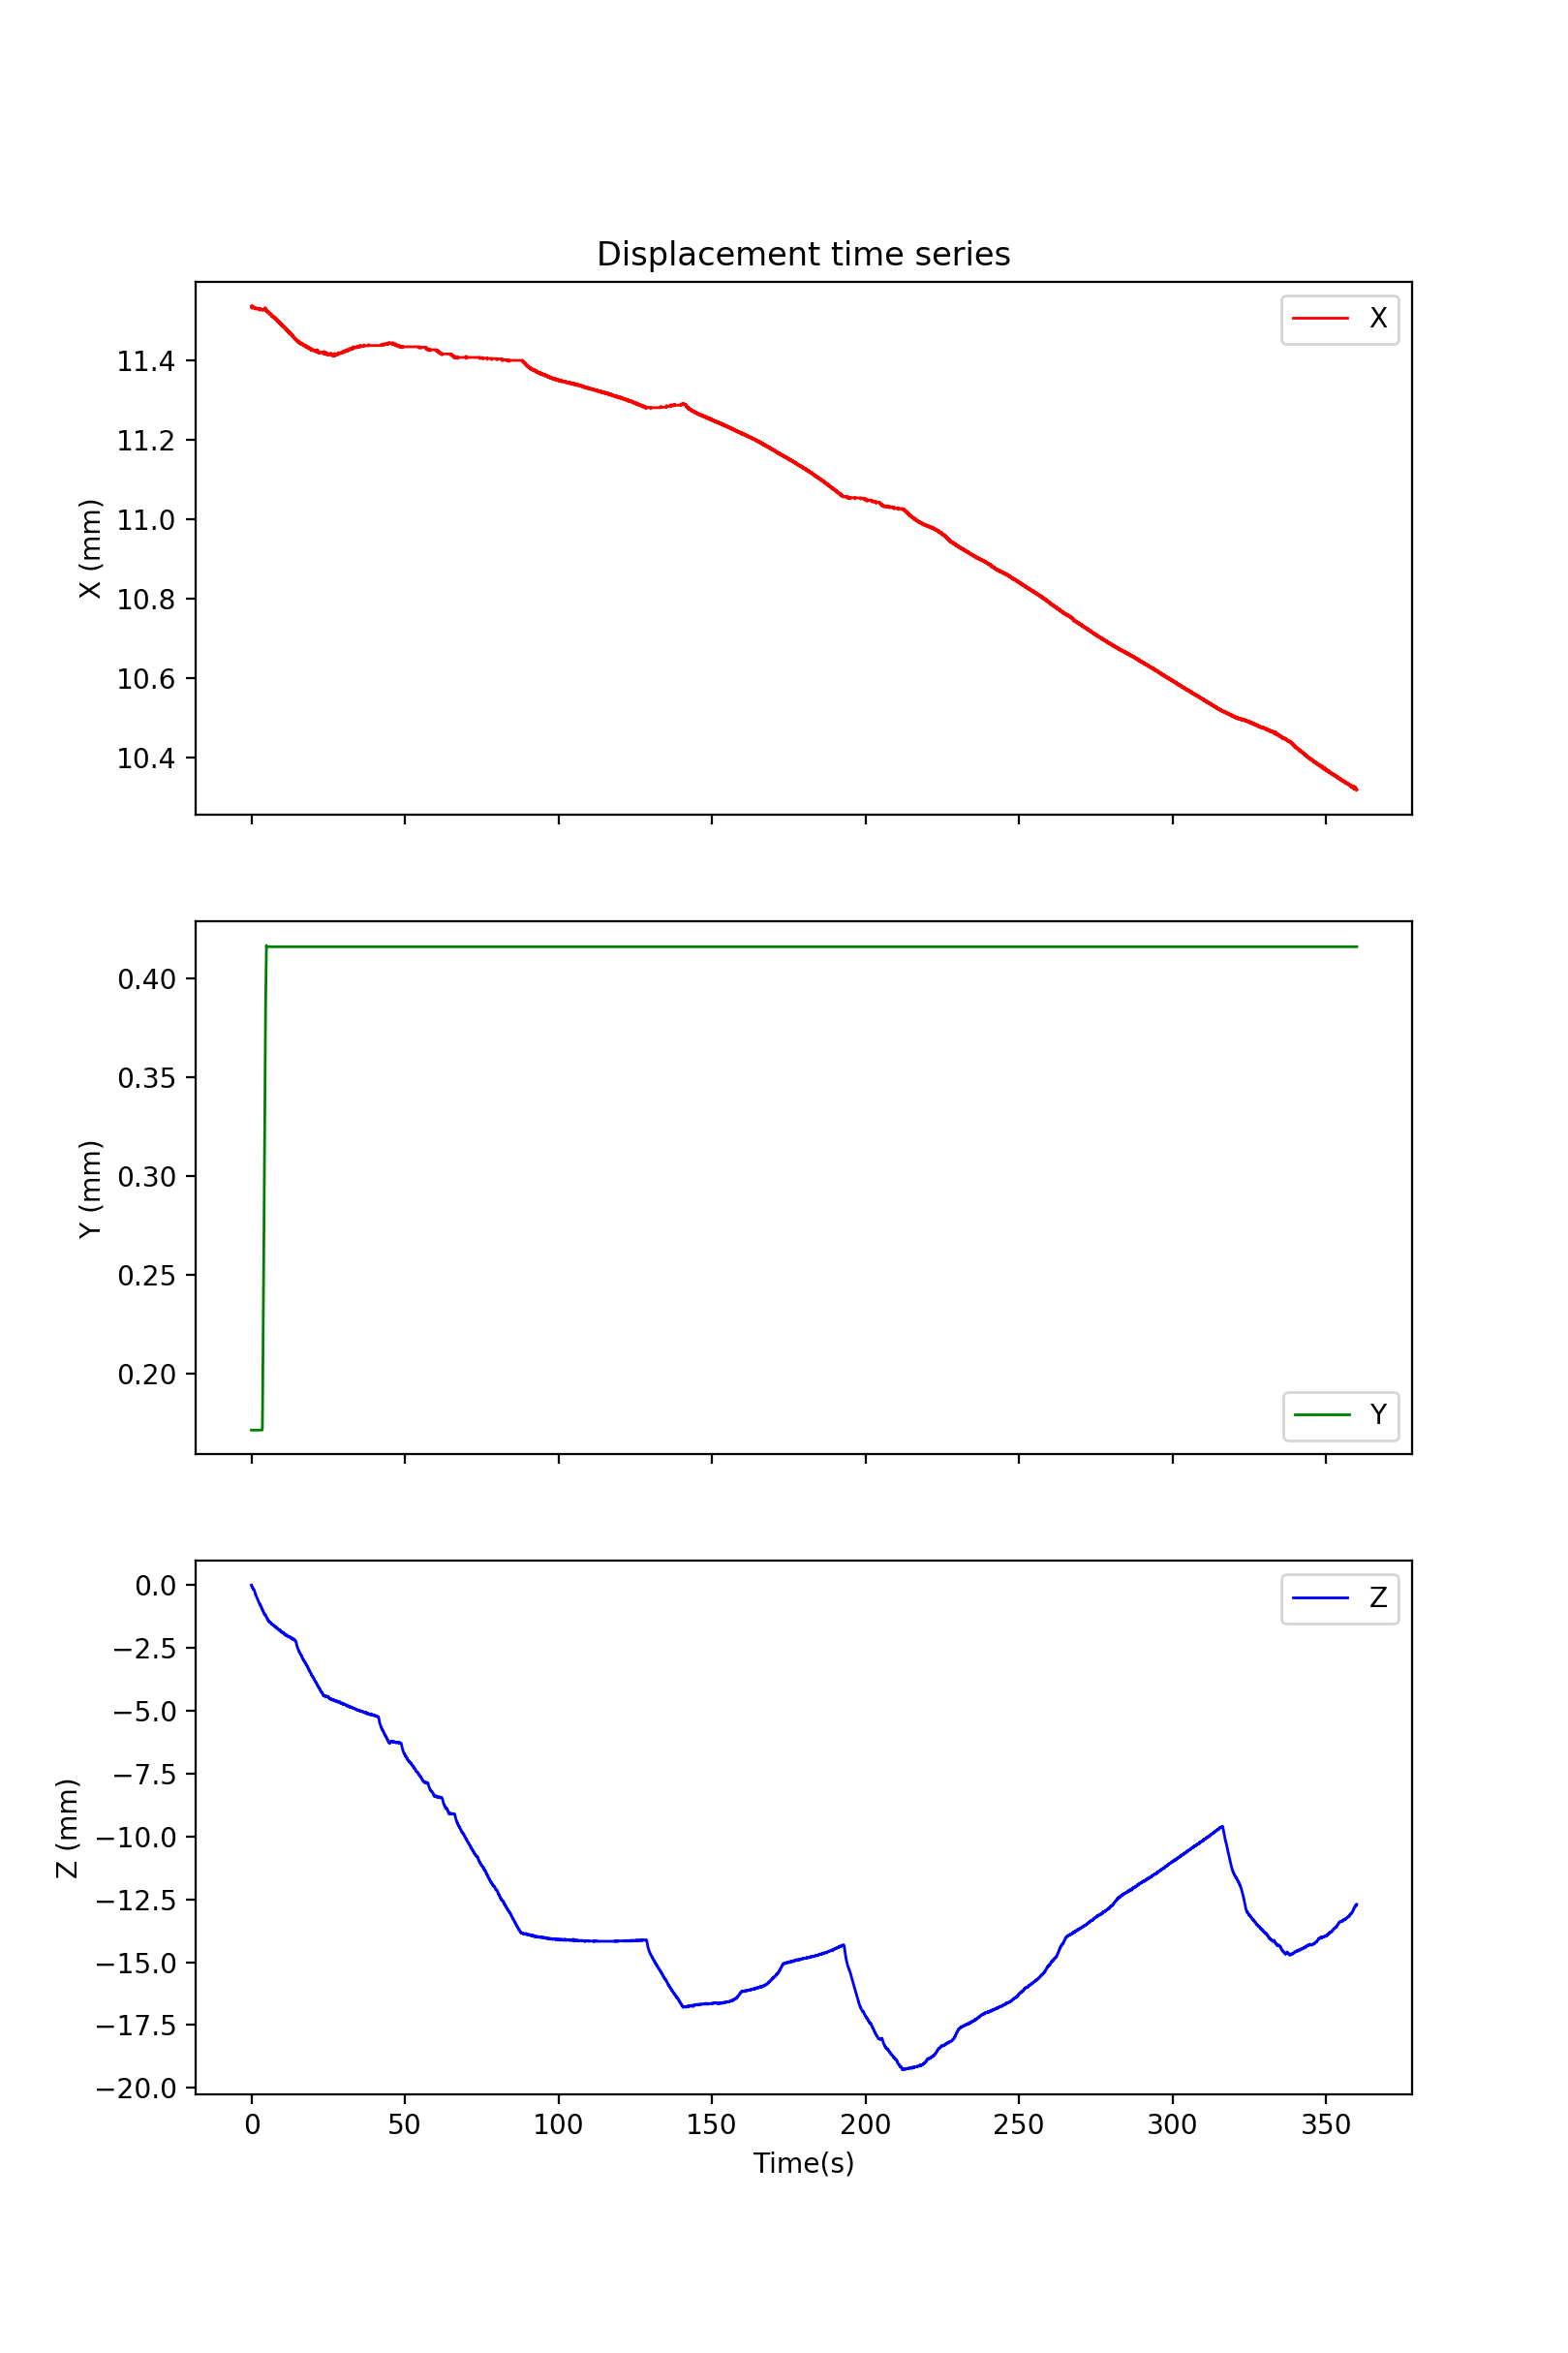

Saved Displacement time series.png to disk
Saved Displacement time series.svg to disk


In [3]:
# The analysis API has a built-in function to generate X, Y, Z displacement plots
gm_analysis.plot_displacement_timeseries()

# To save the plots to file, do the following
gm_analysis.plot_displacement_timeseries(save = True)

## Compute the object's velocity

In [10]:
gm_analysis.compute_velocity()

## Apply a low-pass filter to the velocity data to filter out high-freq noise


In [11]:
window_size = 40
print('Window size: ',window_size)
gm_analysis.data['V_x'] = np.array(gm_analysis.data['V_x'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_y'] = np.array(gm_analysis.data['V_y'].rolling(window = window_size, min_periods=1, center = True).mean())
gm_analysis.data['V_z'] = np.array(gm_analysis.data['V_z'].rolling(window = window_size, min_periods=1, center = True).mean())

print(gm_analysis.data['V_x'])

Window size:  40
0       -0.003412
1       -0.003249
2       -0.003102
3       -0.002967
4       -0.002843
           ...   
16007   -0.006276
16008   -0.006537
16009   -0.006821
16010   -0.007132
16011   -0.007471
Name: V_x, Length: 16012, dtype: float64


## Plot a time-series for the velocity

<IPython.core.display.Javascript object>


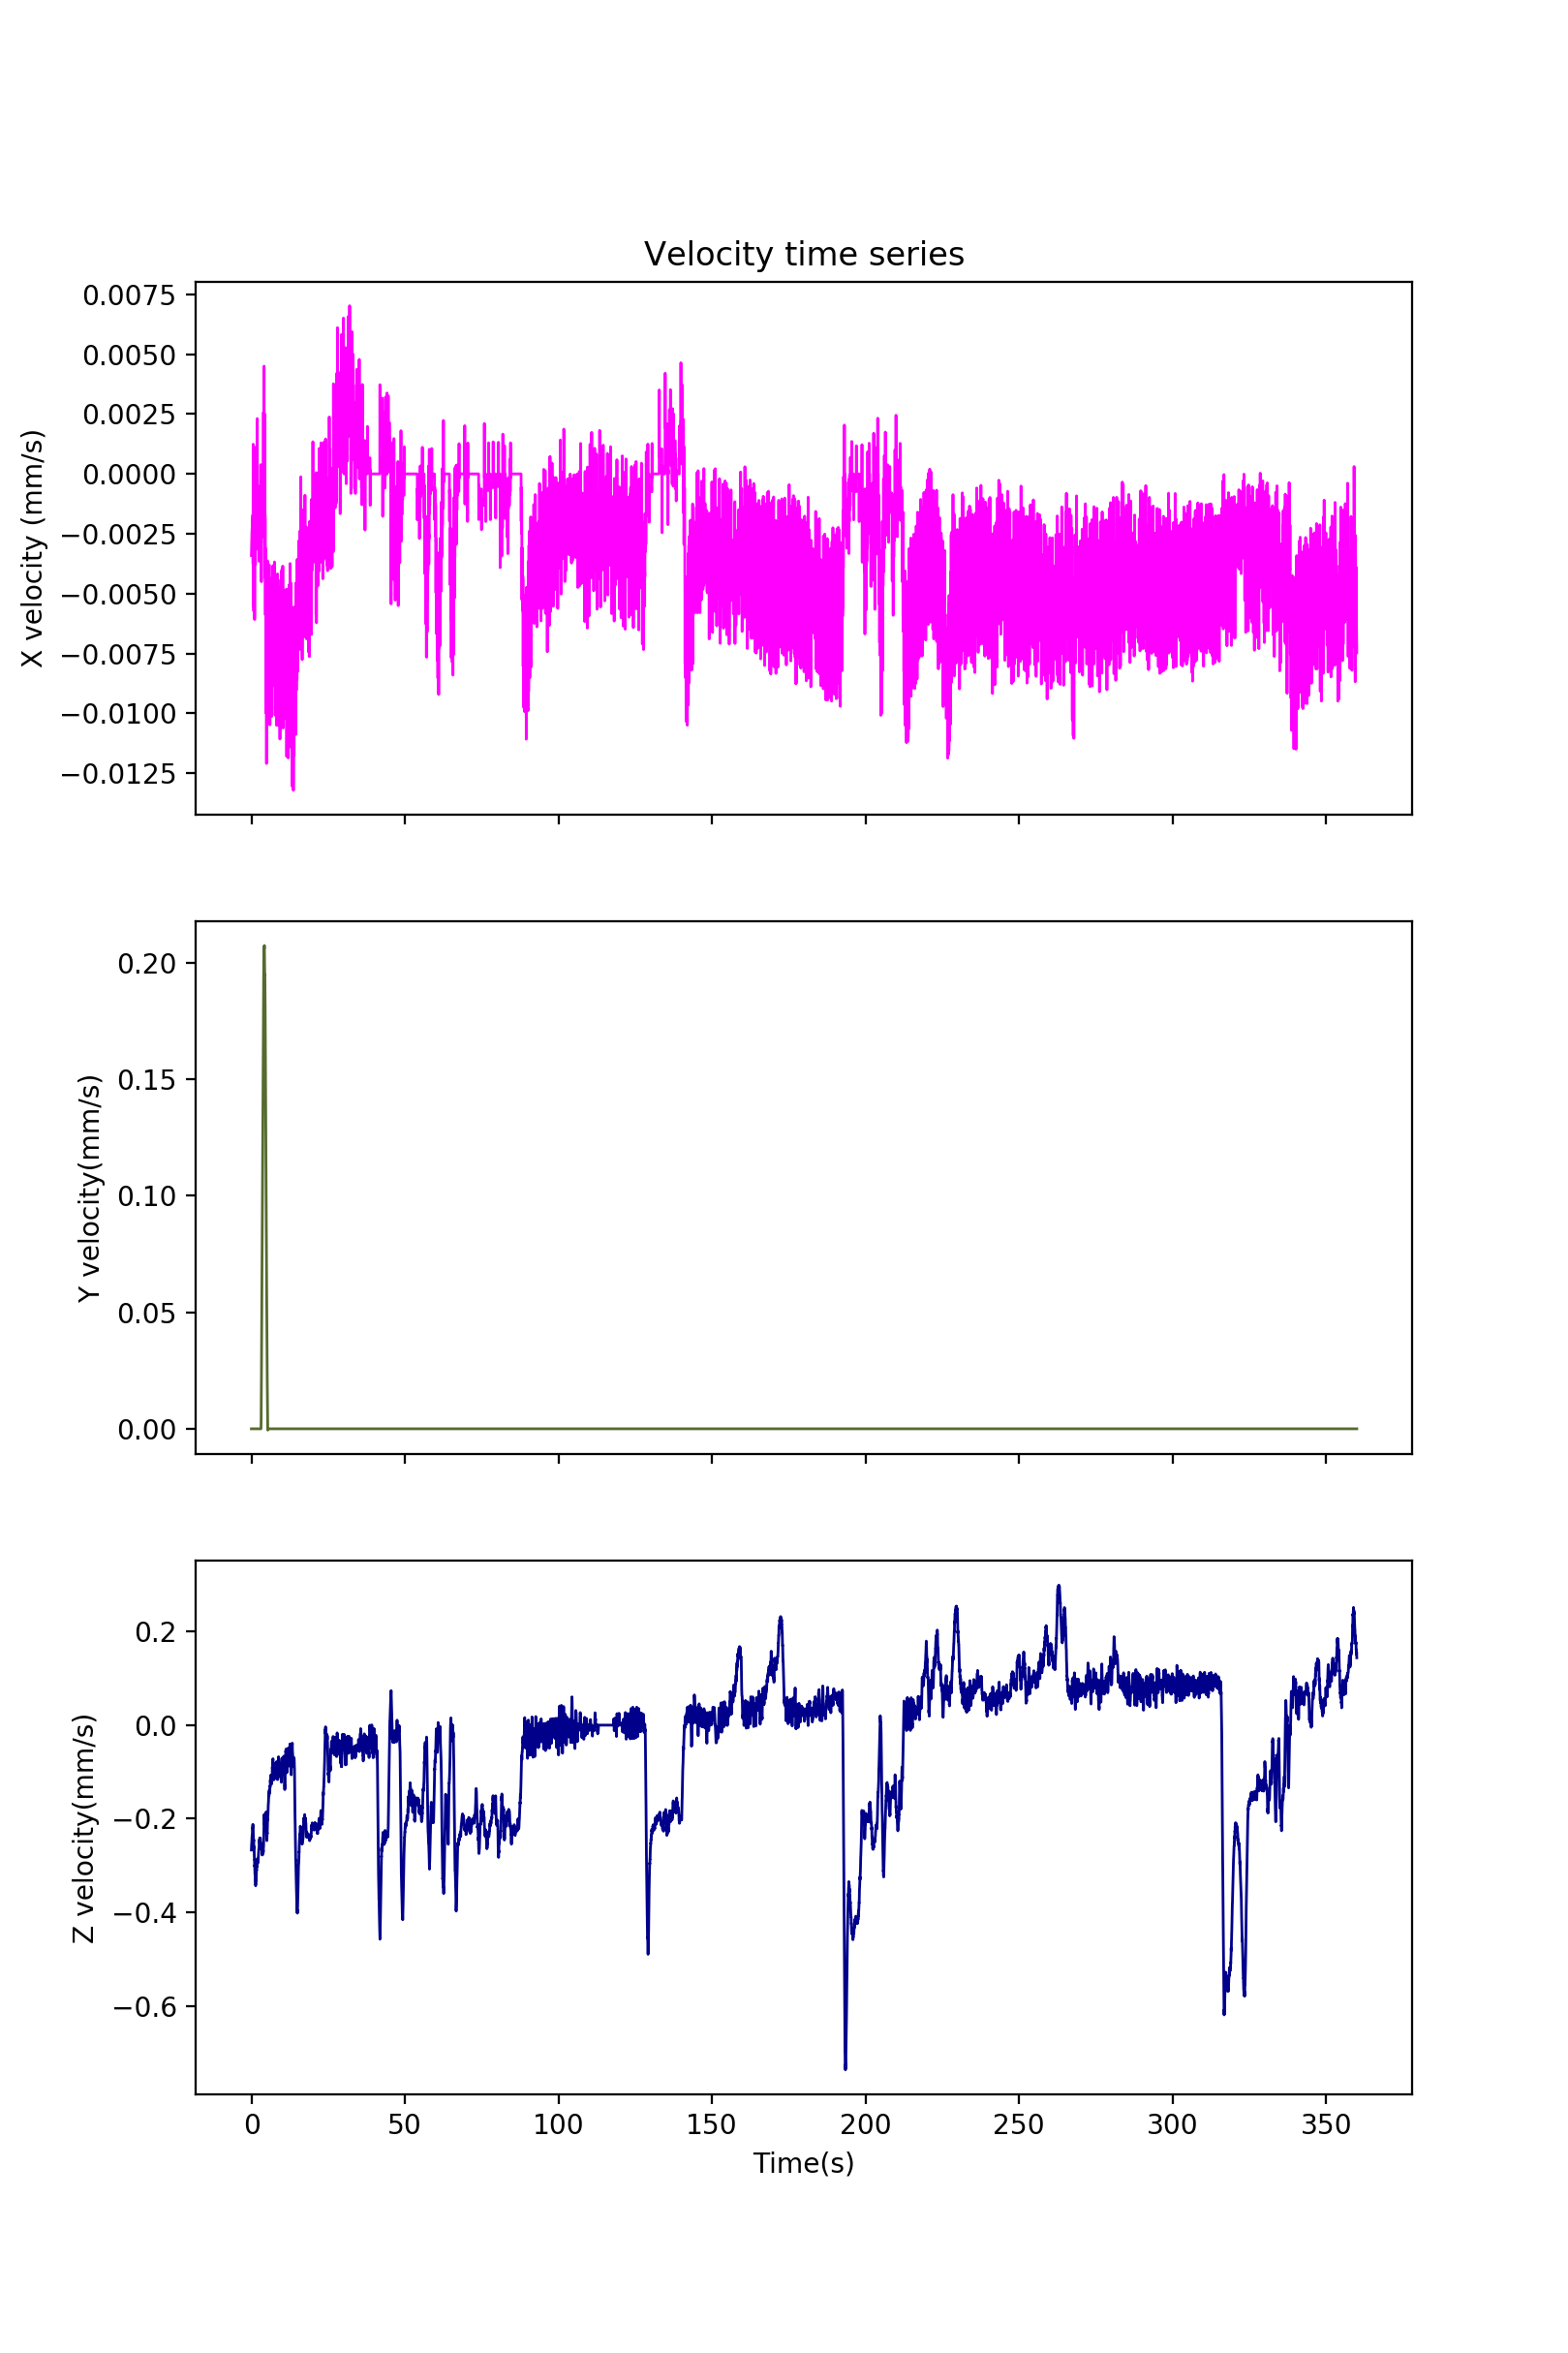

In [6]:
gm_analysis.plot_velocity_timeseries()

## Find the size of the object of interest

In [13]:
gm_analysis.set_color_thresholds()


Image Width: 720 px 
 Image Height: 540 px
D:\GravityMachine_2020\DiatomData_withv2codebase_forTesting\Centric_diatom_PurtoRico_2018\images000\IMG_3878.tif
Color thresholds for segmentation: 
 LOW: (0, 0, 76), HIGH : (255, 255, 255)


In [14]:
gm_analysis.find_object_size()

[3302 1595 1887  602 2612  940 2185 1101 1759 1547  296 3285 2620 2197
 3332  355  599 3746 2109 2961 3553 2855 3560  468 3071  395 2706 3836
  701   71  235 1785  936 1957 1813 2485 1245 2112 3556  381  868  649
 4063  552 2367 1779 2018 2991 2962 1781  743 1631  760 3990 2814 3971
  728 3165  444 1985 2544 3610 1844 2242   71 2198 2346  802 1525 1443
 3059 2711  628  799 2902 2603 2561  136 2655  404 4082  399 3912 2374
  187 1136 1332 3880 2064 2312 1756 3428 2628 1969 3082   96 2620 2263
  451 1534]
IMG_7180.tif
No:of contours:1
IMG_5473.tif
No:of contours:1
IMG_5765.tif
No:of contours:1
IMG_4480.tif
No:of contours:1
IMG_6490.tif
No:of contours:1
IMG_4818.tif
No:of contours:2
IMG_6063.tif
No:of contours:1
IMG_4979.tif
No:of contours:1
IMG_5637.tif
No:of contours:1
IMG_5425.tif
No:of contours:1
IMG_4174.tif
No:of contours:1
IMG_7163.tif
No:of contours:2
IMG_6498.tif
No:of contours:1
IMG_6075.tif
No:of contours:2
IMG_7210.tif
No:of contours:1
IMG_4233.tif
No:of contours:2
IMG_4477.ti

C:\Users\Deepak\Anaconda3\envs\gm_py3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


## Running PIV on a pair of frames

--------------------------------------------------
Loading PIV data for: IMG_4000.tif and IMG_4001.tif 

--------------------------------------------------
0.023430811018308448


<IPython.core.display.Javascript object>


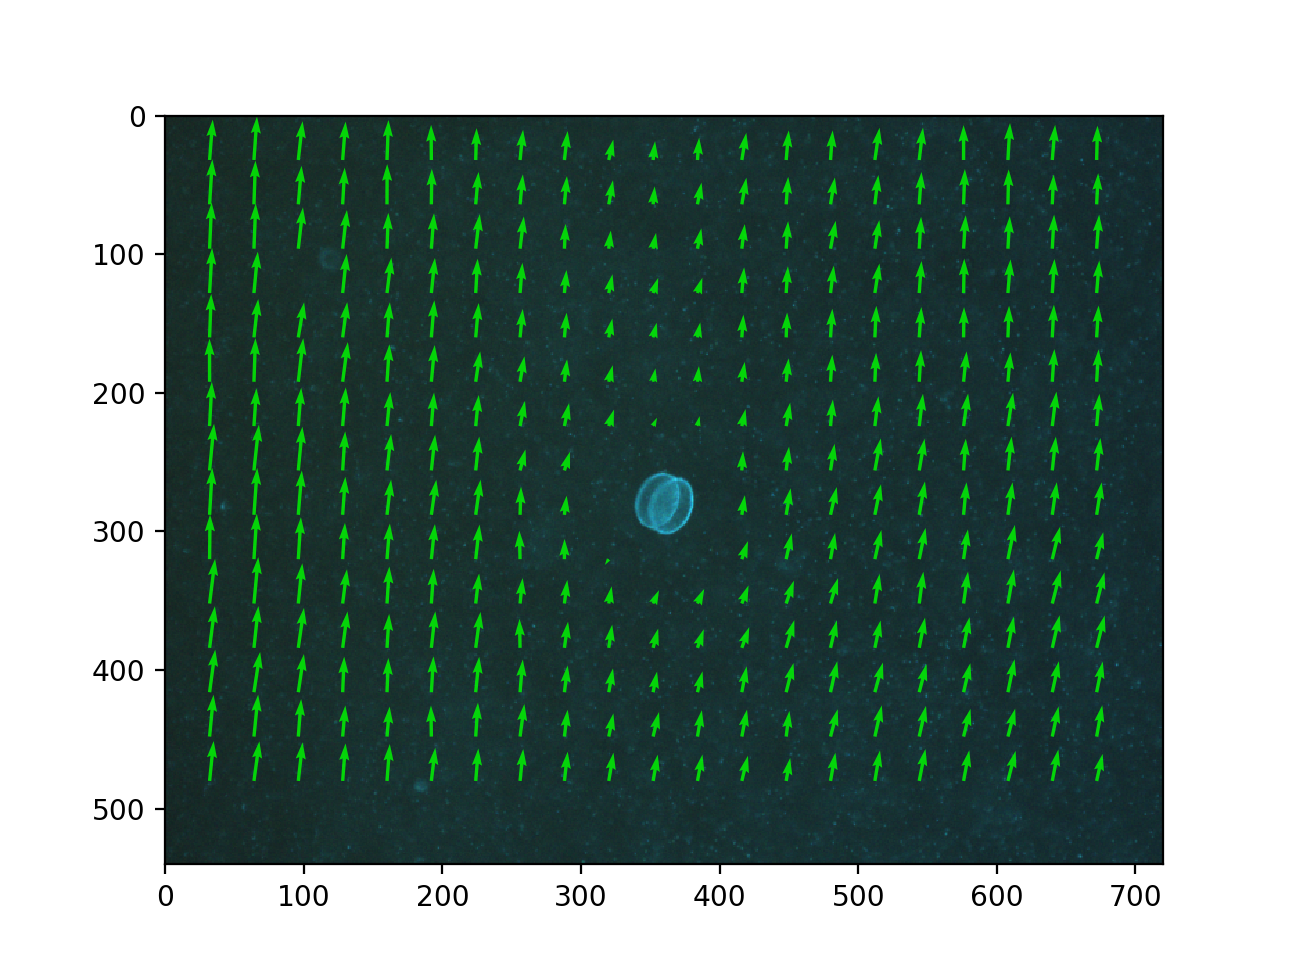

0.0025286513586442994
0.02090215965966415


(0.0025286513586442994,
 0.02090215965966415,
 0.001284949793500012,
 0.005200164595073628)

In [15]:
image_a = 'IMG_4000.tif'
image_b = 'IMG_4001.tif'
gm_analysis.initialize_piv_analysis()
gm_analysis.compute_background_fluid_velocity(image_a, image_b)

In [17]:
gm_analysis.piv_settings

{'window size': 64, 'overlap': 32, 'search area': 64}

## Running PIV analysis to compute the object's velocity and displacement relative to the fluid

In [18]:
gm_analysis.compute_fluid_velocity_timeseries()

Fluid time series found! Loading ...


## Compute the corrected displacement of the object relative to the fluid

In [19]:
gm_analysis.compute_fluid_relative_disp(overwrite_flag = False, save = True)

Fluid time series found! Loading ...


<IPython.core.display.Javascript object>


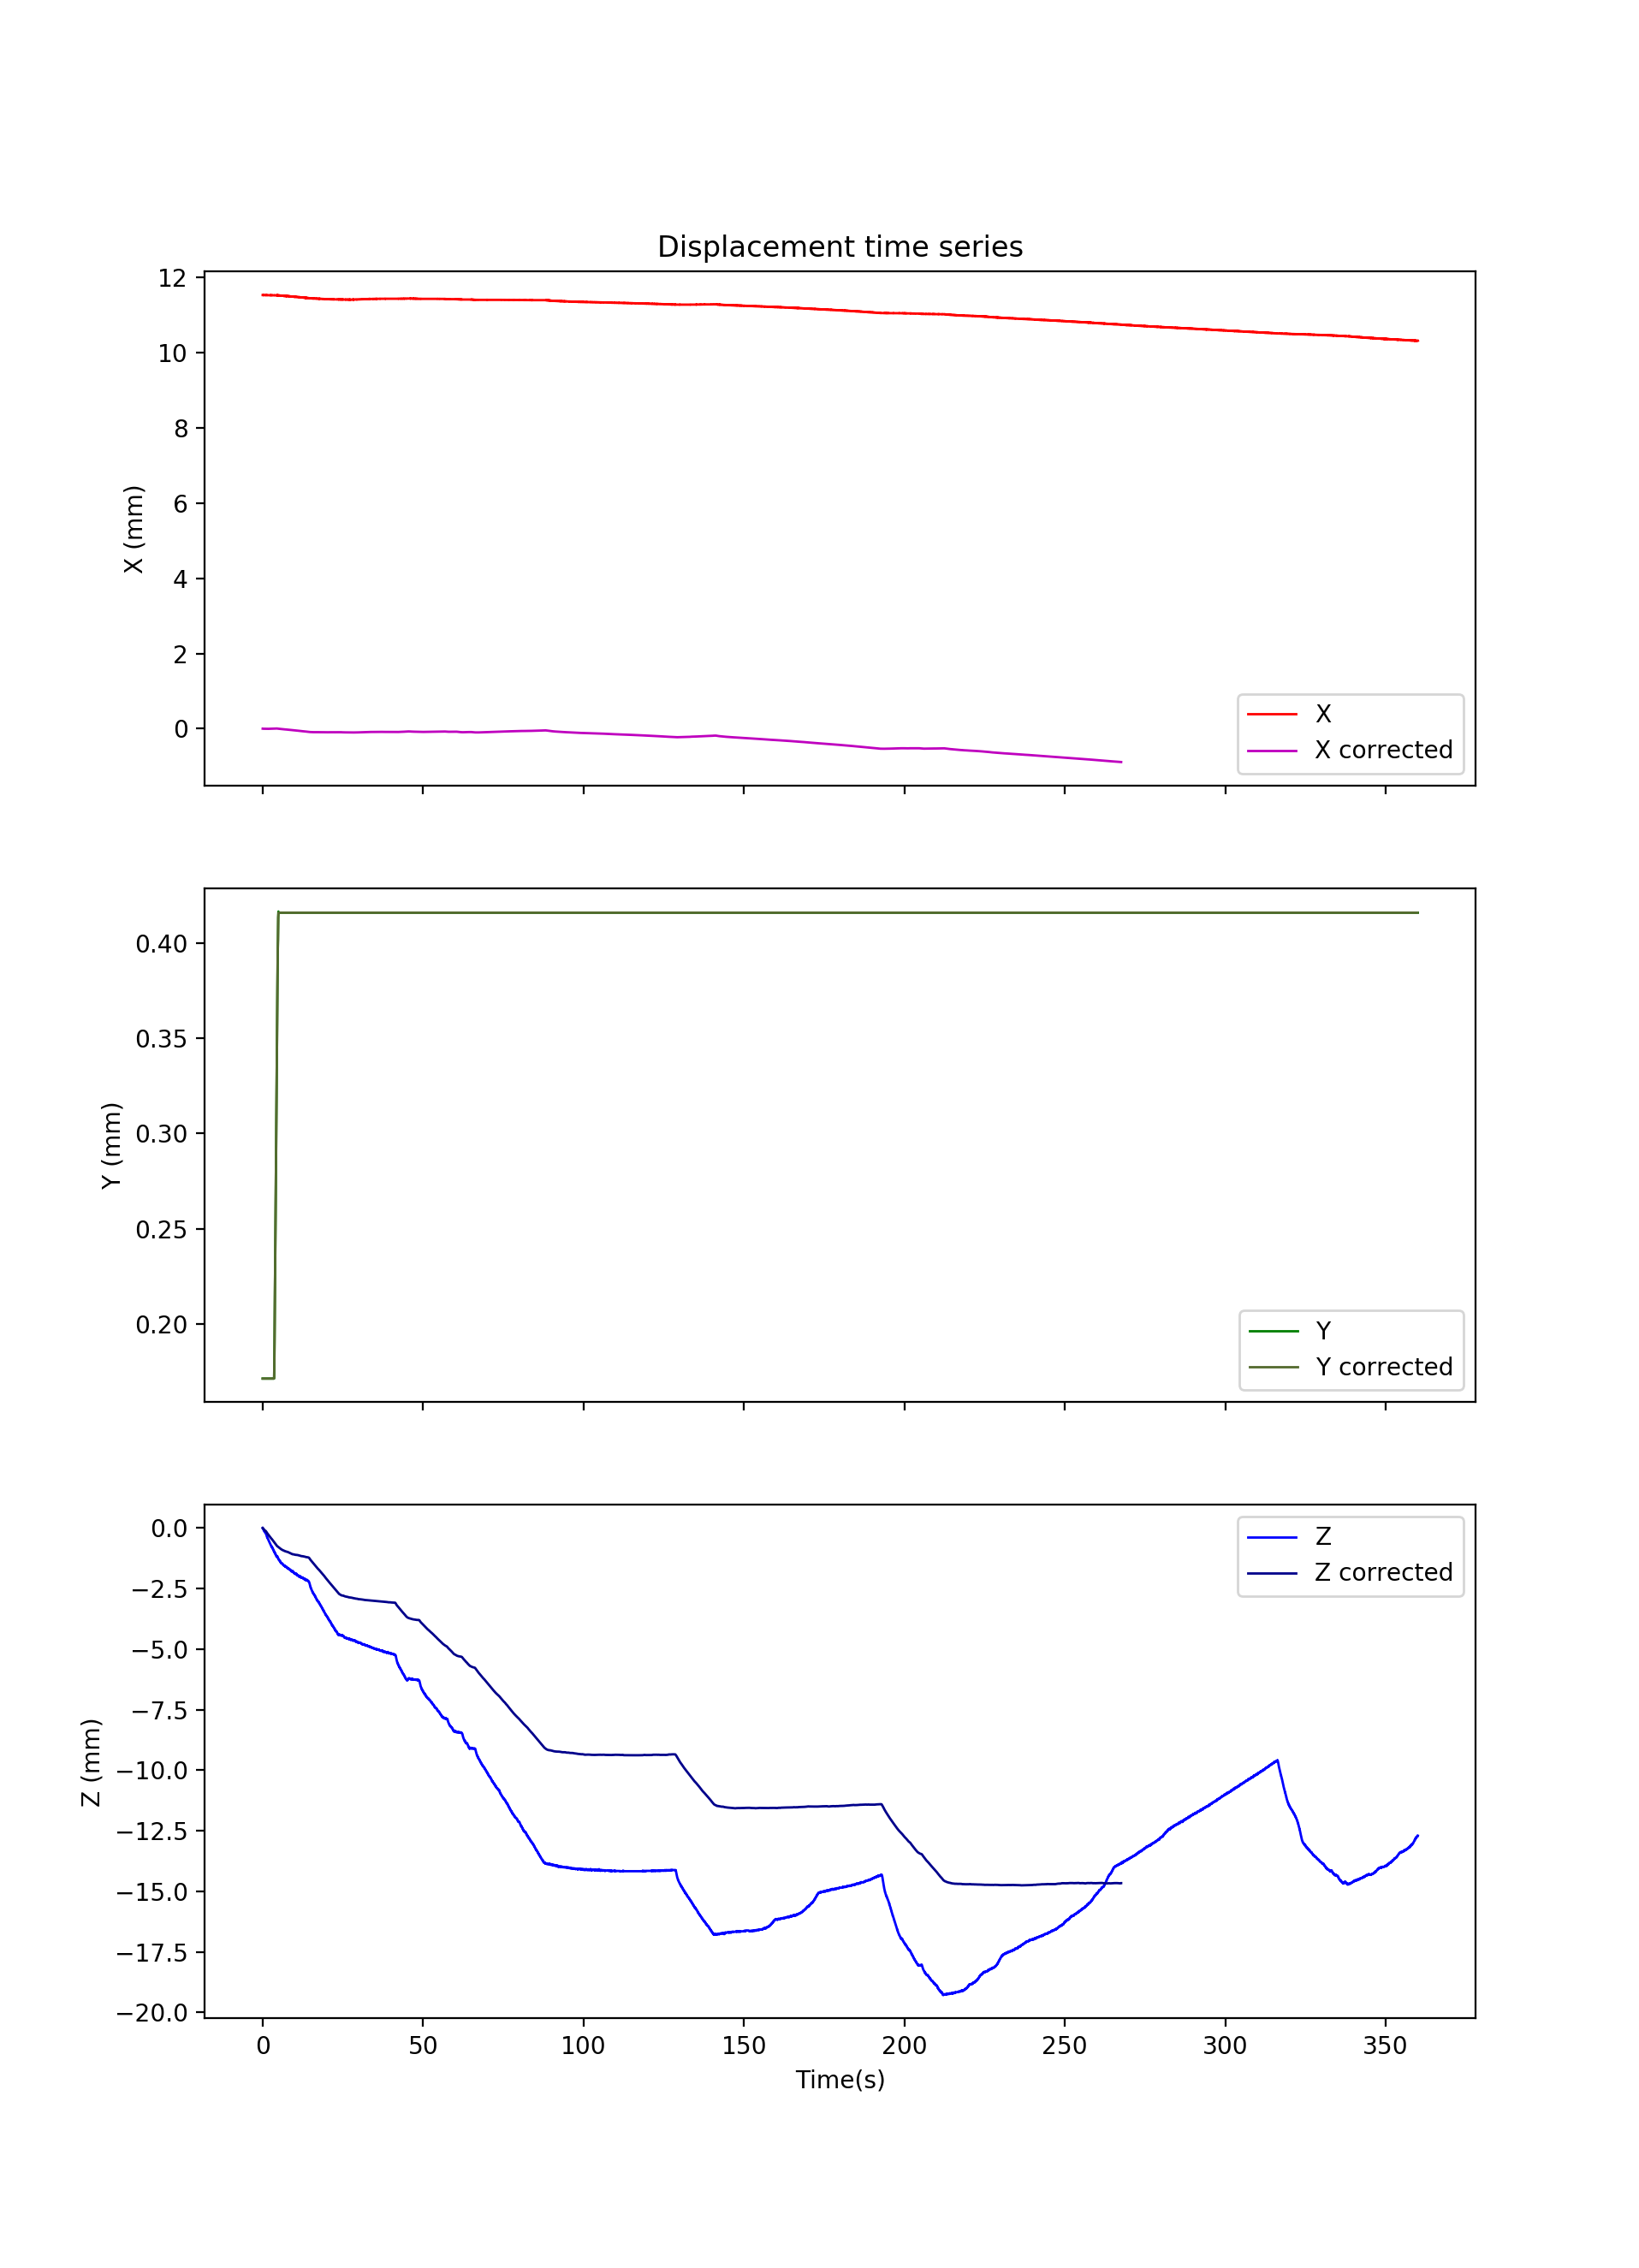

In [20]:
## Plot the raw and corrected displacements
units = {'Time':'(s)', 'X':'(mm)','Y':'(mm)','Z':'(mm)', 'V_x': '(mm/s)','V_y': '(mm/s)','V_z': '(mm/s)', 'Theta':'(rad)'}

import seaborn as sns

title = 'Displacement time series'
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize = (8,12))
ax1.set_title(title)
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['X'], color = 'r', linewidth = 1, label = 'X', ax = ax1, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['X'], color = 'm', linewidth = 1, label = 'X corrected', ax = ax1, ci = None)
ax1.set_ylabel('X '+units['X'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Y'], color = 'g', linewidth = 1, label = 'Y', ax = ax2, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Y'], color = 'darkolivegreen', linewidth = 1, label = 'Y corrected', ax = ax2, ci = None)
ax2.set_ylabel('Y '+units['Y'])
sns.lineplot(x = gm_analysis.data['Time'], y = gm_analysis.data['Z'], color = 'b', linewidth = 1, label = 'Z', ax = ax3, ci = None)
sns.lineplot(x = gm_analysis.derived_data['Time'], y = gm_analysis.derived_data['Z'], color = 'darkblue', linewidth = 1, label = 'Z corrected', ax = ax3, ci = None)

ax3.set_ylabel('Z '+units['Z'])
ax3.set_xlabel('Time' + units['Time'])
plt.show()

In [21]:
gm_analysis.data

,Time,X,Y,Z,Image name,X_image,Z_image,V_x,V_y,V_z,V_x_image,V_z_image
0,0.000000,11.536563,0.171250,0.000000,IMG_3878.tif,None,-0.108280,-0.003412,0.000000e+00,-0.266825,0.0,0.000000
1,0.025081,11.536563,0.171250,-0.010422,NaN,None,-0.108280,-0.003249,0.000000e+00,-0.261678,0.0,0.075113
2,0.042399,11.536563,0.171250,-0.007238,NaN,None,-0.105096,-0.003102,0.000000e+00,-0.260641,0.0,0.000000
3,0.066455,11.536563,0.171250,-0.020845,IMG_3879.tif,None,-0.108280,-0.002967,0.000000e+00,-0.256521,0.0,0.000000
4,0.086212,11.533378,0.171250,-0.017660,NaN,None,-0.105096,-0.002843,0.000000e+00,-0.252639,0.0,0.069476
...,...,...,...,...,...,...,...,...,...,...,...,...
16007,359.887024,10.319375,0.415938,-12.726232,IMG_8002.tif,None,0.035032,-0.006276,3.691492e-17,0.150749,0.0,0.000000
16008,359.912891,10.319375,0.415938,-12.715937,NaN,None,0.035032,-0.006537,3.845304e-17,0.157030,0.0,0.071786
16009,359.931388,10.316190,0.415938,-12.712753,NaN,None,0.038217,-0.006821,4.012491e-17,0.151105,0.0,0.000000
16010,359.963501,10.319062,0.415938,-12.715937,IMG_8003.tif,None,0.035032,-0.007132,4.194877e-17,0.147845,0.0,-0.059052


0        0.171250
1        0.171250
2        0.171250
3        0.171250
4        0.171250
           ...   
16007    0.415938
16008    0.415938
16009    0.415938
16010    0.415938
16011    0.415938
Name: Y, Length: 16012, dtype: float64

10
9
8
7
6
5
4
3
2
1
